In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB05A')

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

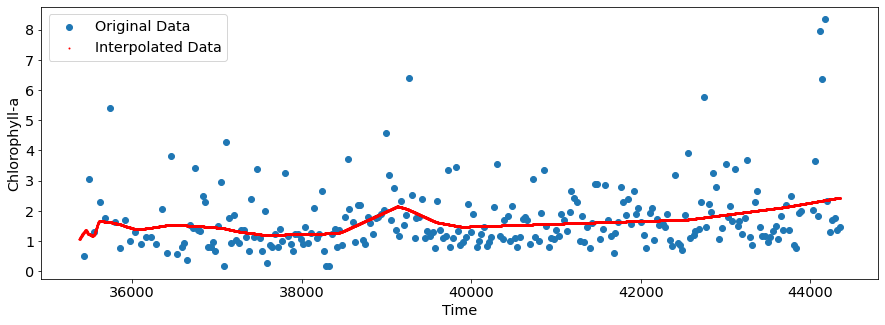

313/313 [==============================] - 0s 346us/step - loss: 1.9787e-16
['loss']


array([[0.14155163],
       [0.12535477],
       [0.16172129],
       [0.18298364],
       [0.18024573],
       [0.17724028],
       [0.17246272],
       [0.16687077],
       [0.15990415],
       [0.15083985],
       [0.15023056],
       [0.15256302],
       [0.15542755],
       [0.15833154],
       [0.161582  ],
       [0.16491058],
       [0.1669206 ],
       [0.16763087],
       [0.16725685],
       [0.25357708],
       [0.2553477 ],
       [0.2571773 ]], dtype=float32)

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB05A.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.16
chlorophylla_max = 8.34
time_min = 35436.00 
time_max = 44354.46  

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.003475936
,0.010091426
,0.016931171
,0.023770915
,0.03061066
,0.037450404
,0.044402276
,0.051017766
,0.057857511
,0.068173191
,0.071537
,0.078376744
,0.085328616
,0.091944106
,0.098783851
,0.105623595
,0.11246334
,0.119303084
,0.126254956
,0.952070008
,0.955433816
,0.958909752
])
interpolation